<a href="https://colab.research.google.com/github/ShikhaVishwakarma/Deepfake-Detection/blob/main/UberLyft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline

In [3]:
cab_data = pd.read_csv("/content/cab_rides.csv")
#cab_data=reduce_mem_usage(cab_data)
weather_data = pd.read_csv("/content/weather.csv")
#weather_data=reduce_mem_usage(weather_data)

In [4]:
cab_data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
91612,0.61,Uber,1.543850e+12,West End,Haymarket Square,15.5,1.0,d238e713-2e84-43c0-8e22-3a9f10a69c7b,6c84fd89-3f11-4782-9b50-97c468b19529,Black
91613,0.99,Uber,1.543230e+12,Financial District,Haymarket Square,NaN,1.0,1f4cfd45-0a20-456b-8c15-8d5215628e49,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
91614,0.99,Uber,1.543480e+12,Financial District,Haymarket Square,7.0,1.0,280a3fa1-b527-442c-a7f1-a497578d2683,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
91615,0.99,Uber,1.544680e+12,Financial District,Haymarket Square,11.5,1.0,62db8839-dedd-4433-a6c8-52c1b15bc59d,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL


In [5]:
weather_data

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [6]:
import datetime
cab_data['datetime']= pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'])

In [7]:
cab_data.columns, weather_data.columns


(Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
        'surge_multiplier', 'id', 'product_id', 'name', 'datetime'],
       dtype='object'),
 Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
        'humidity', 'wind', 'date_time'],
       dtype='object'))

In [8]:
cab_data.shape, weather_data.shape

((91617, 11), (6276, 9))

In [9]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,91617.000000,9.161700e+04,84403.000000,91617.000000
mean,2.196456,1.544034e+12,16.585998,1.015202
std,1.140015,6.880398e+08,9.358621,0.095469
min,0.020000,1.543200e+12,2.500000,1.000000
25%,1.300000,1.543440e+12,9.000000,1.000000
50%,2.170000,1.543720e+12,13.500000,1.000000
75%,2.940000,1.544820e+12,22.500000,1.000000
max,7.500000,1.545160e+12,92.000000,3.000000


In [10]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [12]:
data=pd.concat([cab_data,weather_data])

In [13]:
data['day']=a.date_time.dt.day
data['hour']=a.date_time.dt.hour

In [14]:
data.isnull().sum

<bound method DataFrame.sum of       distance  cab_type  time_stamp  ...  date_time    day   hour
0        False     False       False  ...       True   True   True
1        False     False       False  ...       True   True   True
2        False     False       False  ...       True   True   True
3        False     False       False  ...       True   True   True
4        False     False       False  ...       True   True   True
...        ...       ...         ...  ...        ...    ...    ...
6271      True      True       False  ...      False  False  False
6272      True      True       False  ...      False  False  False
6273      True      True       False  ...      False  False  False
6274      True      True       False  ...      False  False  False
6275      True      True       False  ...      False  False  False

[97893 rows x 21 columns]>

In [15]:
data.fillna(0,inplace=True)


In [16]:
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [17]:
data.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,41151,41151,41151,41151,41151,41151,41151,41151,41151,41151,41151,41151,41151,41151,41151,41151,41151,41151,41151,41151
Uber,50466,50466,50466,50466,50466,50466,50466,50466,50466,50466,50466,50466,50466,50466,50466,50466,50466,50466,50466,50466


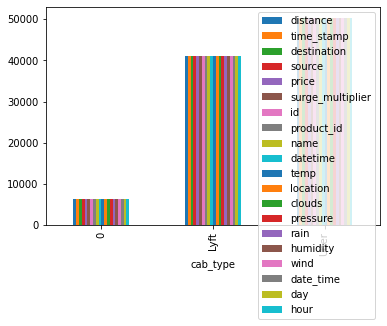

In [18]:
data.groupby('cab_type').count().plot.bar()

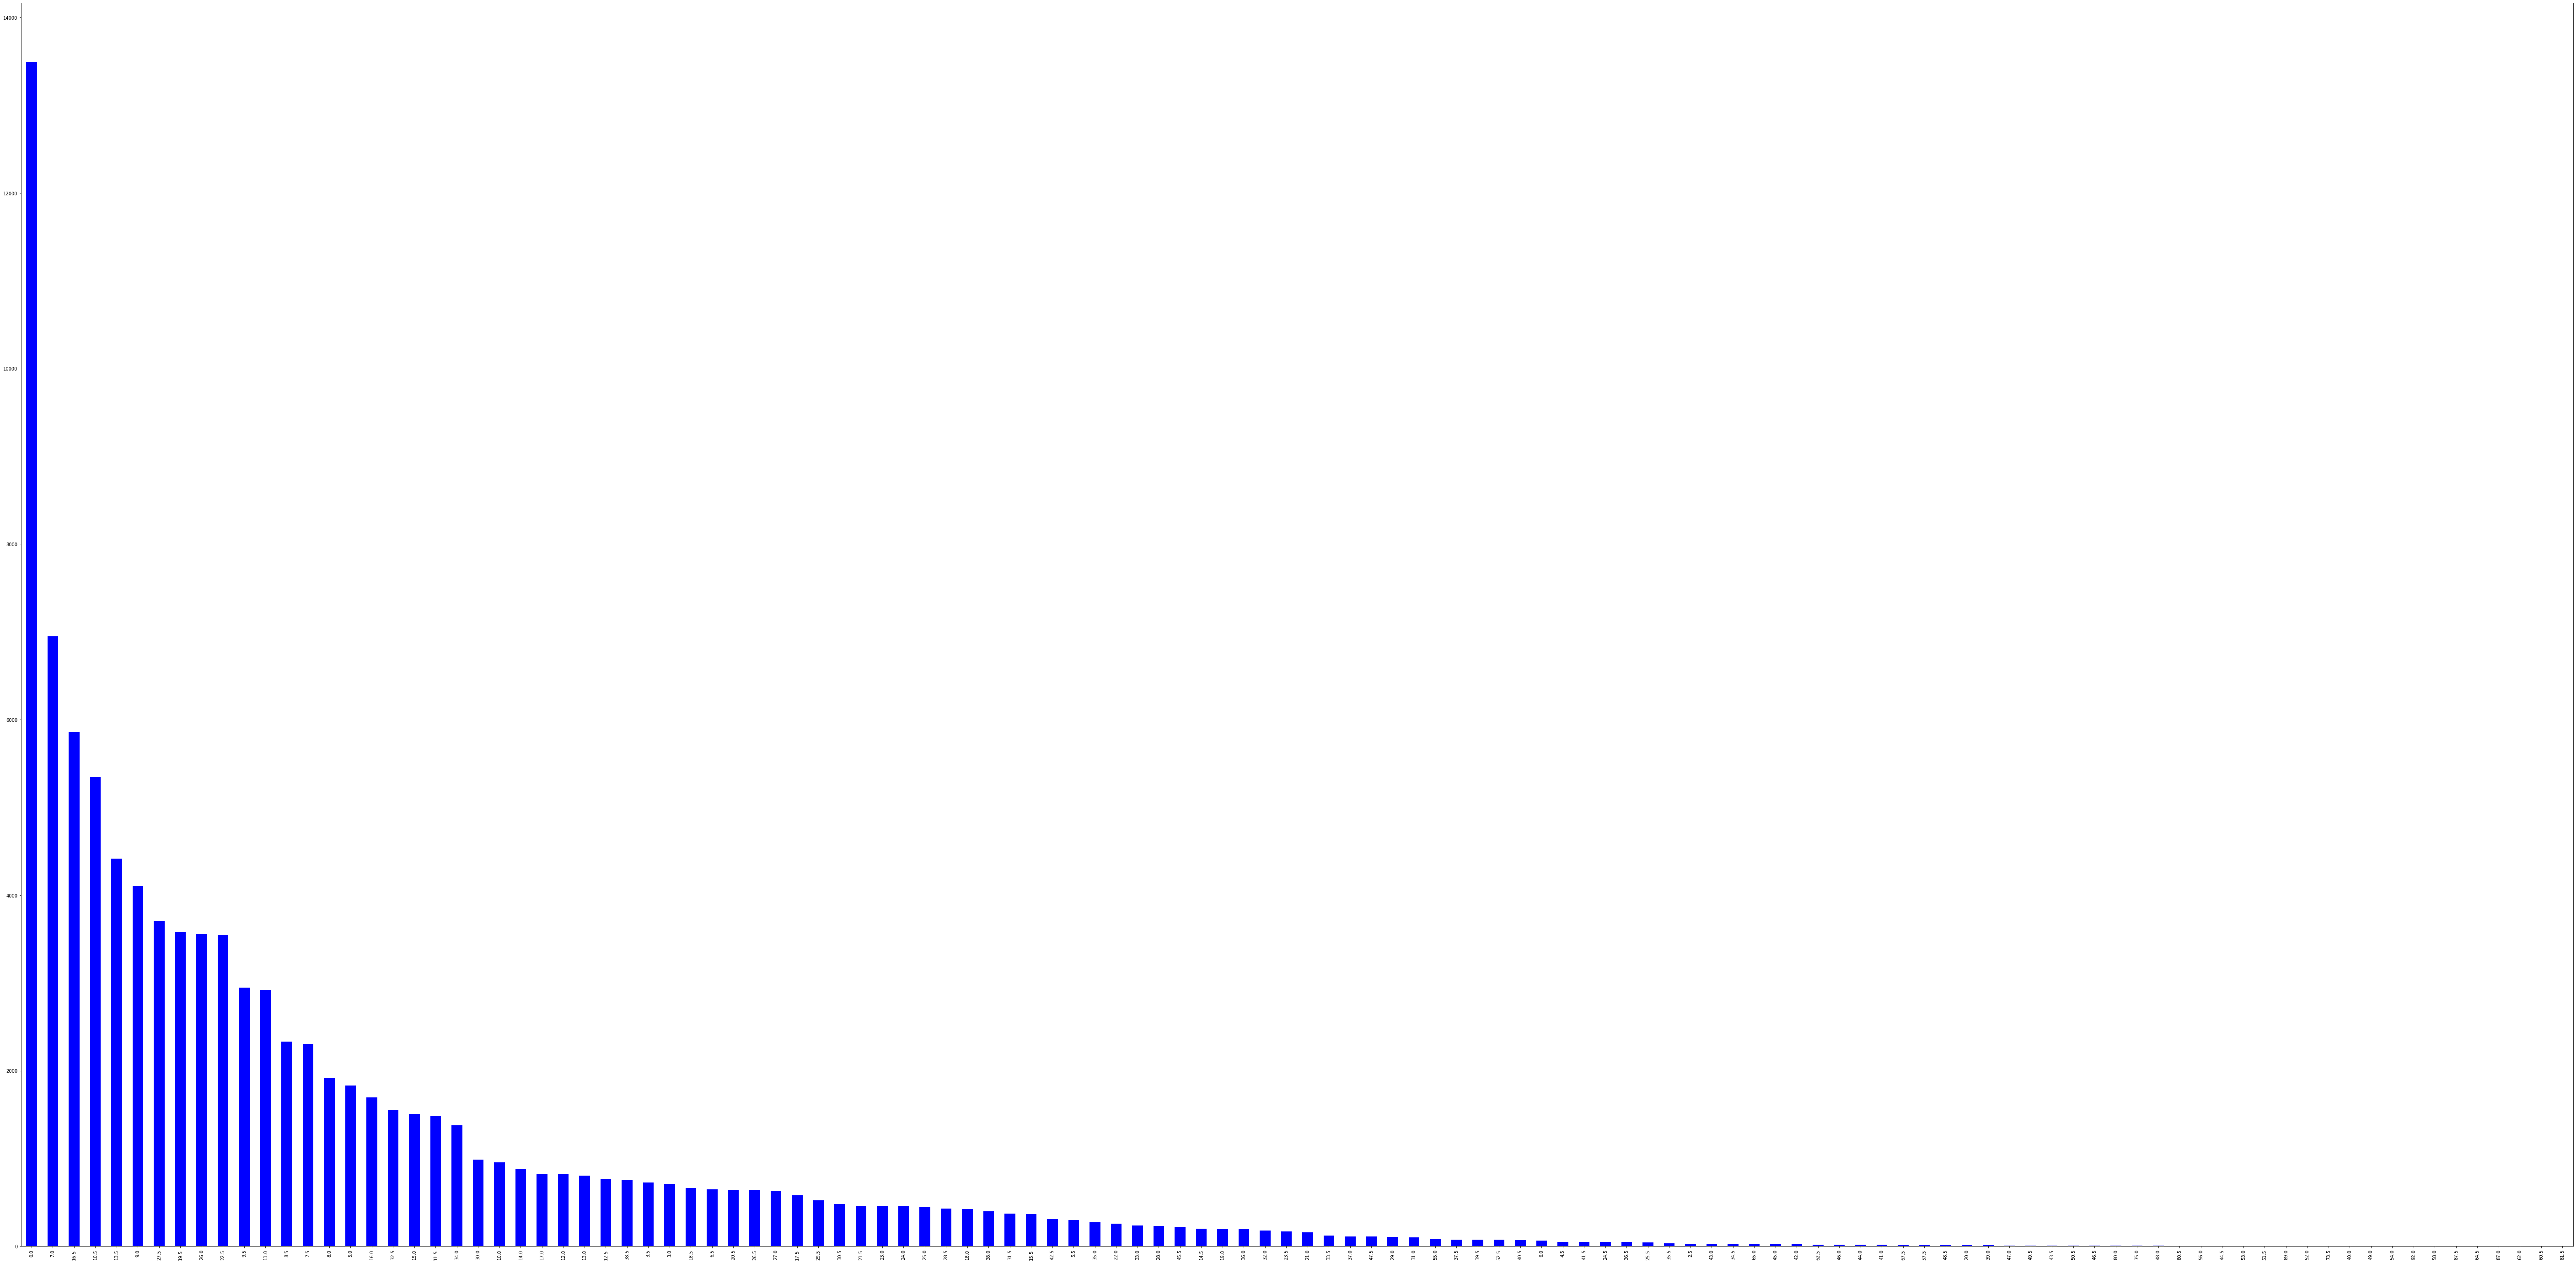

In [19]:
data['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')

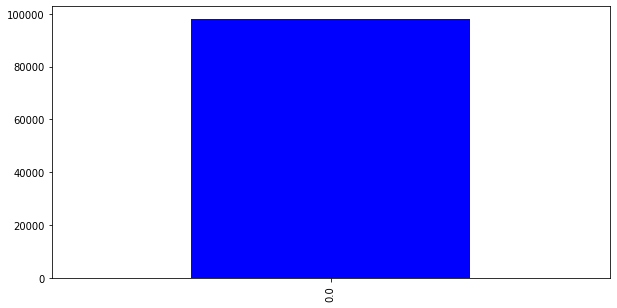

In [20]:
data['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

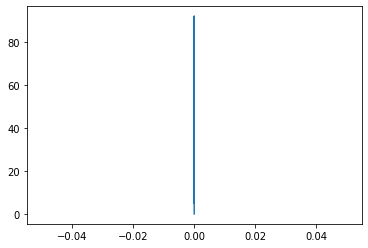

In [21]:
import matplotlib.pyplot as plt
x=data['hour']
y=data['price']
plt.plot(x,y)
plt.show()

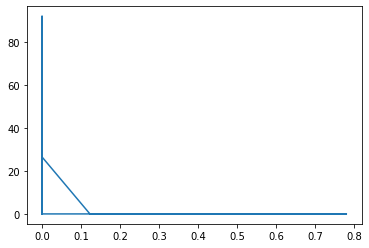

In [22]:
x=data['rain']
y=data['price']
plt.plot(x,y)
plt.show()

In [23]:
data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [24]:
x1=data[['distance', 'temp','clouds', 'pressure', 'humidity','wind','rain','day','hour','surge_multiplier','clouds']]
y1=data['price']

In [25]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, y_train, x_test, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 42)

In [26]:
linear=LinearRegression()
linear.fit(x_train,x_test)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
predictions=linear.predict(y_train)

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
11894,11.5,13.482579
53674,0.0,10.669021
70574,9.5,10.720177
70084,13.5,11.871178
35753,19.5,22.571269
...,...,...
23642,0.0,13.124490
49808,18.5,12.306000
44880,9.0,15.989203
11155,0.0,11.692133


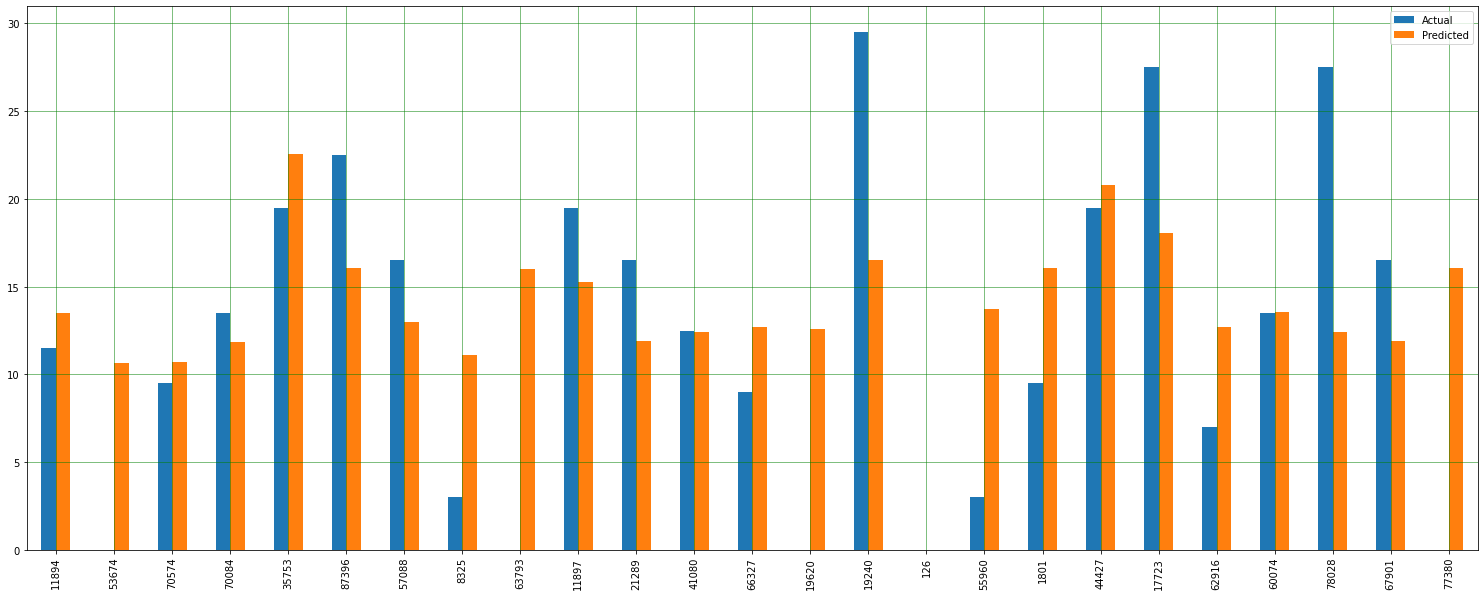

In [29]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [30]:
#task: find the error!